### IMPORTAMOS LIBRERÍAS Y LEEMOS EL FICHERO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTAMOS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

In [ ]:
# Leemos el fichero
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto entregrable/bmw_pricing_v3 (1).csv")
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
# variables del dataset y sus tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
#Cuantas columnas y filas hay?
df.shape

(4843, 18)

In [ ]:
#Estadistiocas de las variables cuantitativas
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
#Analisis preeliminar de los nulos
df.isnull().sum()

,0
marca,970
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486


In [ ]:
#Porcentaje de nulos en cada columna del dataset
df.isnull().mean() *100

,0
marca,20.028908
modelo,0.061945
km,0.041297
potencia,0.020648
fecha_registro,50.030973
tipo_gasolina,0.103242
color,9.188520
tipo_coche,30.146603
volante_regulable,0.082593
aire_acondicionado,10.035102


Se observa que la variable gps es la unica sin valores nulos. Por otro lado, tenemos un porcentaje de nulos muy elevado en las variables como (fecha_registro, marca, asientos_traseros_plegables, tipo_coche, etc.)

**1. Se entiende que tenemos nomas una marca de autos "BMW", luego no hace falta tener esta variable o columna en nuestro dataset, ya que no nos estaria aportando nada. Ademas, como hay un 70% de valotres nulos en la columna asientos_traseros_plegables, entonces tambien la eliminaremos.**

**Cuanto, a la variable fecha_registro, aunque tiene la mitad de los datos faltantes,hemos decidido quedarnos con ella, ya que podria influir en nuestra variable target.**

In [ ]:
#eliminamos la variable marca y asientos_traseros_plegables
df.drop(['marca', 'asientos_traseros_plegables'], axis=1, inplace=True)

In [ ]:
#Hacemos una copia del dataset anterior
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   fecha_registro        2420 non-null   object 
 4   tipo_gasolina         4838 non-null   object 
 5   color                 4398 non-null   object 
 6   tipo_coche            3383 non-null   object 
 7   volante_regulable     4839 non-null   object 
 8   aire_acondicionado    4357 non-null   object 
 9   camara_trasera        4841 non-null   object 
 10  elevalunas_electrico  4841 non-null   object 
 11  bluetooth             4115 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4115 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta          

Duplicados inicial

In [ ]:
df[df.duplicated(keep=False)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


### MANEJO DE VALORES NULOS

In [ ]:
#Checamos los valores nulos del nuevo dataset
df2.isnull().sum()

,0
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486
camara_trasera,2


Se nota que hay varias columnas/variables con valores nulos menor que 10. Luego, lo que vamos hacer es tomatr estas columnas y eliminar estes valores nulos, ya que son muy poco literalmente.

In [ ]:
#Crearemos un filtro que nos muestra las columnas con valores nulos menor que 10
list_nulos_inf_10 = (df.isnull().sum() < 10) &( df.isnull().sum() != 0)
filtro_nulos_inf_10 = list_nulos_inf_10[list_nulos_inf_10].index
print(filtro_nulos_inf_10, )

Index(['modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable',
       'camara_trasera', 'elevalunas_electrico', 'precio', 'fecha_venta'],
      dtype='object')


In [ ]:
#Ahora eliminaremos estas filas con NAN
df2.dropna(subset=filtro_nulos_inf_10, inplace=True)

In [ ]:
#Verificamos
df2.isnull().sum()

,0
modelo,0
km,0
potencia,0
fecha_registro,2409
tipo_gasolina,0
color,442
tipo_coche,1449
volante_regulable,0
aire_acondicionado,482
camara_trasera,0


In [ ]:
#Ahora para las variables con valores nulos > 10 aplicaremos otro filtro
lista_nulos_sup_10= df2.isnull().sum()>10
filtro_nulos_sup_10= lista_nulos_sup_10[lista_nulos_sup_10].index.tolist()
print(filtro_nulos_sup_10)


['fecha_registro', 'color', 'tipo_coche', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad']


Analizamos la variable fecha_registro

In [ ]:
df2['fecha_registro'].value_counts()

,count
fecha_registro,
2013-07-01,93
2014-03-01,83
2014-05-01,80
2013-10-01,76
2013-01-01,76
...,...
2004-11-01,1
2009-12-01,1
2005-02-01,1


In [ ]:
#Presencia de nulos
df2['fecha_registro'].isnull().sum()

np.int64(2409)

In [ ]:
#Primero cambiamos de formato, creando una nueva variable
df2['fecha_registro_2'] = pd.to_datetime(df2['fecha_registro'])

In [ ]:
#Reemplazamos estos nulos con la mediana
df2['fecha_registro_2'].fillna(df2['fecha_registro_2'].median(), inplace=True)


/tmp/ipython-input-3994123865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['fecha_registro_2'].fillna(df2['fecha_registro_2'].median(), inplace=True)


In [ ]:
#Checamos los nulos
df2['fecha_registro_2'].isnull().sum()

np.int64(0)

In [ ]:
#Ahora ya podemos eliminar la variable fecha_registro
del(df2['fecha_registro'])

Analisis de la variable Color

In [ ]:
#Checamos los nulos
df2['color'].isnull().sum()

np.int64(442)

In [ ]:
#Checamos los valores unicos
df2['color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', nan, 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [ ]:
#Ahora como estan distribuidos estos valores
df2['color'].value_counts()

,count
color,
black,1489
grey,1067
blue,643
white,480
brown,302
silver,290
red,47
beige,37
green,14


In [ ]:
#Calculamos la moda
moda_color = df2['color'].mode()[0]
moda_color

'black'

In [ ]:
#Reemplazamos los valores nulos, por la moda
df2['color'].fillna(moda_color, inplace=True)

/tmp/ipython-input-1205651841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['color'].fillna(moda_color, inplace=True)


Analisis de la variable tipo_coche

In [ ]:
#Checamos los nulos
df2['tipo_coche'].isnull().sum()

np.int64(1449)

In [ ]:
#Checamos los valores unicos
df2['tipo_coche'].unique()

array([nan, 'convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [ ]:
#Ahora como estan distribuidos estos valores
df2['tipo_coche'].value_counts()

,count
tipo_coche,
estate,1097
sedan,821
suv,754
hatchback,488
subcompact,77
coupe,73
convertible,30
van,28


In [ ]:
#Calculamos la moda
moda_tipoCoche = df2['tipo_coche'].mode()[0]
moda_tipoCoche

'estate'

In [ ]:
#Reemplazamos los valores nulos, por la moda
df2['tipo_coche'].fillna('Otros', inplace=True)

/tmp/ipython-input-3014223985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['tipo_coche'].fillna('Otros', inplace=True)


In [ ]:
df2.isnull().sum()

,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,482
camara_trasera,0
elevalunas_electrico,0


Analisis de la variable aire_acondicionado

In [ ]:
#Checamos los nulos
df2['aire_acondicionado'].isnull().sum()

np.int64(482)

In [ ]:
#Checamos los valores unicos
df2['aire_acondicionado'].unique()

array([True, False, nan], dtype=object)

In [ ]:
#Ahora como estan distribuidos estos valores
df2['aire_acondicionado'].value_counts()

,count
aire_acondicionado,
True,3449
False,886


In [ ]:
#Calculamos la moda
moda_aireAcond = df2['aire_acondicionado'].mode()[0]
moda_aireAcond

True

In [ ]:
#Reemplazamos los valores nulos, por la moda
df2['aire_acondicionado'].fillna(moda_aireAcond, inplace=True)

/tmp/ipython-input-2852848559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['aire_acondicionado'].fillna(moda_aireAcond, inplace=True)
/tmp/ipython-input-2852848559.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['aire_acondicionado'].fillna(moda_aireAcond, inplace=True)


Analisis de la variable bluetooth

In [ ]:
#Checamos los nulos
df2['bluetooth'].isnull().sum()

np.int64(725)

In [ ]:
#Checamos los valores unicos
df2['bluetooth'].unique()

array([nan, True, False], dtype=object)

In [ ]:
#Ahora como estan distribuidos estos valores
df2['bluetooth'].value_counts()

,count
bluetooth,
False,3101
True,991


In [ ]:
#Calculamos la moda
moda_bluetooth = df2['bluetooth'].mode()[0]
moda_bluetooth

False

In [ ]:
#Reemplazamos los valores nulos, por la moda
df2['bluetooth'].fillna(moda_bluetooth, inplace=True)

/tmp/ipython-input-1993234975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['bluetooth'].fillna(moda_bluetooth, inplace=True)
/tmp/ipython-input-1993234975.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['bluetooth'].fillna(moda_bluetooth, inplace=True)


Analisis de la variable alerta_lim_velocidad

In [ ]:
#Checamos los nulos
df2['alerta_lim_velocidad'].isnull().sum()

np.int64(725)

In [ ]:
#Checamos los valores unicos
df2['alerta_lim_velocidad'].unique()

array([nan, True, False], dtype=object)

In [ ]:
#Ahora como estan distribuidos estos valores
df2['alerta_lim_velocidad'].value_counts()

,count
alerta_lim_velocidad,
True,2226
False,1866


In [ ]:
#Calculamos la moda
moda_alertaLim = df2['alerta_lim_velocidad'].mode()[0]
moda_alertaLim

True

In [ ]:
#Reemplazamos los valores nulos, por la moda
df2['alerta_lim_velocidad'].fillna(moda_alertaLim, inplace=True)

/tmp/ipython-input-3084756644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['alerta_lim_velocidad'].fillna(moda_alertaLim, inplace=True)
/tmp/ipython-input-3084756644.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['alerta_lim_velocidad'].fillna(moda_alertaLim, inplace=True)


In [ ]:
df2.isnull().sum()

,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0
elevalunas_electrico,0


In [ ]:
#Podriamos aprovechar cambiar el formato de la columna fecha_venta
df2['fecha_venta_2'] = pd.to_datetime(df2['fecha_venta'])

In [ ]:
#Ahora ya podemos eliminar la variable fecha_registro
del(df2['fecha_venta'])

 **2. Manejo de nulos, explicar qué se hizo con los nulos por cada columna**



*   List item
*   List item





### MANEJO DE DUPLICADOS

In [ ]:
# hacemos una copia del dataset anterior
df3 = df2.copy()

In [ ]:
df3.isnull().sum()

,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0
elevalunas_electrico,0


In [ ]:
#checamos los duplicados
df3[df3.duplicated(keep=False)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2


No hay presencia de filas o columnas duplicadas. Eso, es bueno

### ANALISIS UNIVARIABLE

In [ ]:
4#Definicion del target
target=["precio"]


In [ ]:
df4 = df3.copy()
df4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2
0,118,140411.0,100.0,diesel,black,Otros,True,True,False,True,False,True,True,11300.0,2012-02-01,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2013-07-01,2018-02-01
2,320,183297.0,120.0,diesel,white,Otros,False,False,False,True,False,True,False,10200.0,2012-04-01,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2013-07-01,2018-02-01
4,425,97097.0,160.0,diesel,silver,Otros,True,True,False,False,True,True,True,33400.0,2013-07-01,2018-04-01


In [ ]:
def variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="B") and len(dataset[i].unique())==2 and (i not in target):
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
variables(df4)

(['km', 'potencia'],
 [],
 ['modelo',
  'tipo_gasolina',
  'color',
  'tipo_coche',
  'volante_regulable',
  'camara_trasera',
  'elevalunas_electrico'])

In [ ]:
lista_numericas, lista_boolean, lista_categoricas = variables(df4)

In [ ]:
lista_boolean

[]

#### Analizaremos las variables numericas

In [ ]:
print(lista_numericas)

['km', 'potencia']


[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]


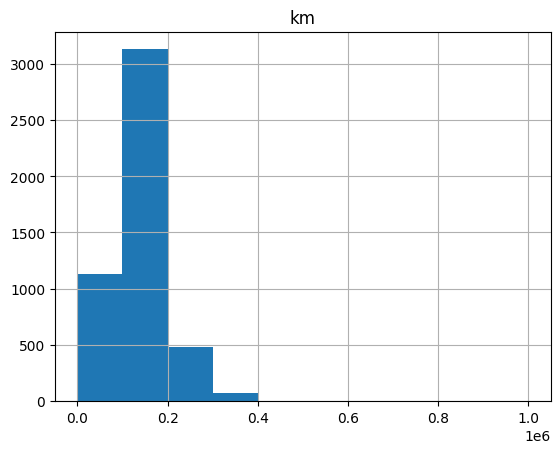

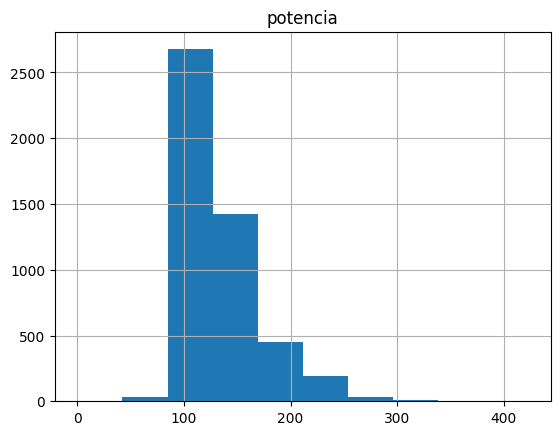

In [ ]:
for i in lista_numericas:
  print(df4.hist(i))

In [ ]:
df4[lista_numericas].describe()

,km,potencia
count,4.817000e+03,4817.000000
mean,1.409353e+05,128.984845
std,6.024268e+04,39.004876
min,-6.400000e+01,0.000000
25%,1.027580e+05,100.000000
50%,1.409910e+05,120.000000
75%,1.752350e+05,135.000000
max,1.000376e+06,423.000000


Se nota que la columna KM tiene valor negativo. Y cuanto a la potencia, esta presenta valores igual a cero, loque no tiene mucho sentido.

Variable KM

<Axes: >

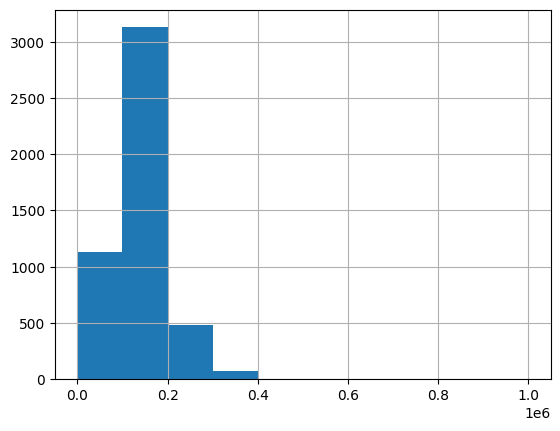

In [ ]:
#vemos el histograma otra vez
df4['km'].hist()

In [ ]:
df4[df4['km']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2013-07-01,2018-04-01


In [ ]:
#vamos a eliminar la fila con km negativo, mediante el uso de index y driop
df4.drop(df4[df4['km']<0].index, inplace=True)

In [ ]:
#Analizemos los autos mayores que 400k km
df4[df4['km']>400000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2
557,520,484615.0,120.0,diesel,blue,estate,True,True,False,False,False,True,False,8300.0,2011-02-01,2018-03-01
1573,320,400654.0,110.0,diesel,black,estate,False,False,True,False,False,True,False,1800.0,2006-12-01,2018-07-01
2350,318,477571.0,85.0,diesel,grey,Otros,False,True,False,False,True,False,False,1200.0,2013-07-01,2018-07-01
2829,525,439060.0,105.0,diesel,silver,Otros,False,False,True,False,False,True,False,100.0,2013-07-01,2018-03-01
3198,320,405816.0,100.0,diesel,blue,sedan,False,False,False,False,False,True,False,500.0,2000-02-01,2018-05-01
3732,118,1000376.0,90.0,diesel,black,Otros,True,False,False,False,False,True,False,1400.0,2005-03-01,2018-06-01


In [ ]:
#Vamos a eliminar este tambien
df4.drop(df4[df4['km']>400000].index, inplace=True)

<Axes: >

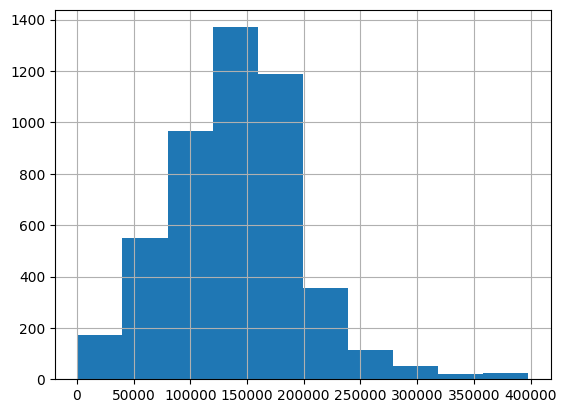

In [ ]:
#Verificar otra vez el histograma
df4['km'].hist()

La mayoría de los vehículos tienen un kilometraje inferior a 200.000 km, lo que indica un uso bajo o moderado en la base de datos.

La distribución presenta sesgo positivo (a la derecha), debido a un pequeño grupo de vehículos con kilometrajes muy altos, algunos cercanos o superiores a 1.000.000 km.

Se identifican valores atípicos que pueden corresponder a errores de registro o casos excepcionales.

Decisión de limpieza: se eliminaron los registros con valores negativos y mayores a 400.000 km, ya que el rango 0 a 400.000 km cubre la gran mayoría de los datos y reduce el impacto de valores extremos.

Justificación estadística: esta limpieza mejora la representatividad de la muestra, disminuye la dispersión artificial de los datos y evita que valores atípicos distorsionen los análisis estadísticos y los modelos predictivos.

Variable Potencia

<Axes: >

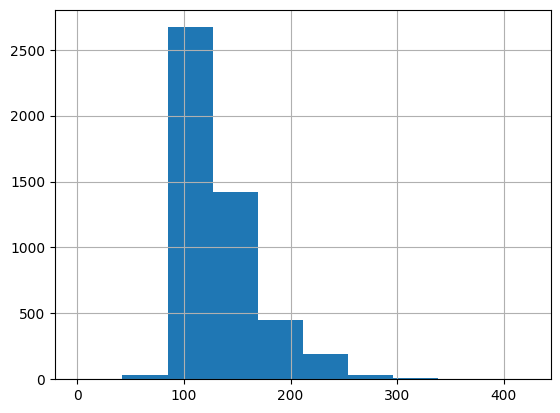

In [ ]:
#Ver el histograma
df4['potencia'].hist()

Segun el describe, teniamos un valor igual a cero y eso tenemos que borrarlo o corrigirlo

In [ ]:
#Checar el valor igual a cero
df4[df4['potencia']==0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2
3765,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,True,11700.0,2014-10-01,2018-03-01


In [ ]:
#Eliminarenos la fila de potencia igual a cero
df4.drop(df4[df4['potencia']==0].index, inplace=True)

<Axes: >

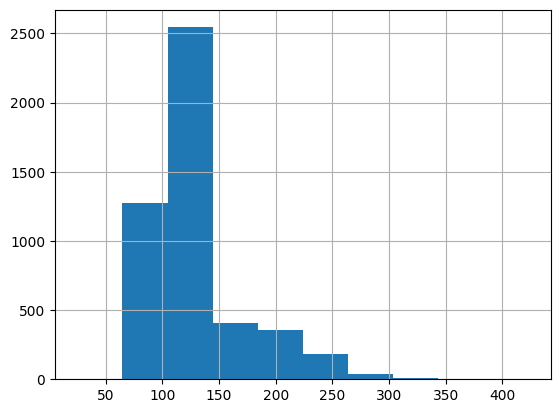

In [ ]:
#hist
df4['potencia'].hist()

In [ ]:
df4['potencia'].unique()

array([100., 317., 120., 135., 160., 225., 145., 105., 125., 130., 270.,
       110., 140., 180.,  85., 190., 236., 240., 250., 230., 309., 170.,
       142., 155., 210., 122., 200.,  90., 150., 141., 173., 137., 280.,
       112., 189.,  80., 119.,  95., 220., 107., 127.,  25.,  70., 192.,
       101.,  75., 239., 235.,  87.,  66.,  77., 195., 183., 233., 121.,
       224., 412., 423., 300., 261.])

Lista categoricas


Modelo

In [ ]:
df5=df4.copy()

In [ ]:
# Eliminar el espacio antes de la palabra de manera general
df5['modelo'] = df5['modelo'].str.strip()

In [ ]:
df5['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       'Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [ ]:
#

In [ ]:
df5['modelo'].nunique()

76

In [ ]:
# Normalizaremos algunos modelos con el objetivo de tener algo más simplificado.
# O sea, tendremos nomás modelos bases, y no sus variantes

df5['modelo'] = df5['modelo'].str.replace('320 Gran Coupé', '320')
df5['modelo'] = df5['modelo'].str.replace('320 Gran Turismo', '320')
df5['modelo'] = df5['modelo'].str.replace('640 Gran Coupé', '640')
df5['modelo'] = df5['modelo'].str.replace('640 Gran Turismo', '640')
df5['modelo'] = df5['modelo'].str.replace('325 Gran Turismo', '325')
df5['modelo'] = df5['modelo'].str.replace('330 Gran Turismo', '330')
df5['modelo'] = df5['modelo'].str.replace('335 Gran Turismo', '335')
df5['modelo'] = df5['modelo'].str.replace('418 Gran Coupé', '418')
df5['modelo'] = df5['modelo'].str.replace('420 Gran Coupé', '420')
df5['modelo'] = df5['modelo'].str.replace('430 Gran Coupé', '430')
df5['modelo'] = df5['modelo'].str.replace('435 Gran Coupé', '435')
df5['modelo'] = df5['modelo'].str.replace('520 Gran Turismo', '520')
df5['modelo'] = df5['modelo'].str.replace('530 Gran Turismo', '530')
df5['modelo'] = df5['modelo'].str.replace('535 Gran Turismo', '535')
df5['modelo'] = df5['modelo'].str.replace('218 Active Tourer', '218')
df5['modelo'] = df5['modelo'].str.replace('218 Gran Tourer', '218')
df5['modelo'] = df5['modelo'].str.replace('216 Active Tourer', '216')
df5['modelo'] = df5['modelo'].str.replace('216 Gran Tourer', '216')
df5['modelo'] = df5['modelo'].str.replace('220 Active Tourer', '220')
df5['modelo'] = df5['modelo'].str.replace('225 Active Tourer', '225')
df5['modelo'] = df5['modelo'].str.replace('214 Gran Tourer', '214')



In [ ]:
df5['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', 'i8', '630', '635', '520', '525', '530',
       '535', '518', '116', '328', '523', 'X3', 'M550', '528', '125',
       '318 Gran Turismo', 'i3', '114', 'M135', '418', '730', '123',
       '740', '750', 'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4',
       'X6', 'X6 M', 'X5 M', 'X5 M50', '216', 'Active Tourer', '214'],
      dtype=object)

In [ ]:
# seguimos normalizando
df5['modelo'] = df5['modelo'].str.replace('318 Gran Turismo', '318')
df5['modelo'] = df5['modelo'].str.replace('318 Active Tourer', '318')
df5['modelo'] = df5['modelo'].str.replace('X6 M', 'X6')
df5['modelo'] = df5['modelo'].str.replace('X5 M|X5 M50', 'X5', regex=True)
df5['modelo'] = df5['modelo'].str.replace('M135|M235|M3|M4|M5|M550', 'M series', regex=True)


In [ ]:
df5['modelo'].unique()

array(['118', 'M series', '320', '420', '425', '335', '325', 'Z4', '120',
       '220', '650', '135', '218', '318', '430', '330', '225', '316',
       '435', '640', 'i8', '630', '635', '520', '525', '530', '535',
       '518', '116', '328', '523', 'X3', 'M series50', '528', '125', 'i3',
       '114', '418', '730', '123', '740', '750', 'ActiveHybrid 5', '735',
       'X5', 'X1', 'X4', 'X6', 'X550', '216', 'Active Tourer', '214'],
      dtype=object)

In [ ]:
# Siguimos teniendo muchas categorías, entonces vamos a agruparlos otra vez basándonos en características reales de BMW como
# segmento, línea, función y rango de precio.

# Agrupamos en las 20 categorías definidas
df5['modelo'] = df5['modelo'].str.replace('114|116|118|120|123|125|135', 'Serie 1', regex=True)
df5['modelo'] = df5['modelo'].str.replace('216|218|220|225|214|Active Tourer', 'Serie 2', regex=True)
df5['modelo'] = df5['modelo'].str.replace('316|318|320|323|325|328|330|335', 'Serie 3', regex=True)
df5['modelo'] = df5['modelo'].str.replace('418|420|425|430|435', 'Serie 4', regex=True)
df5['modelo'] = df5['modelo'].str.replace('518|520|523|525|528|530|535', 'Serie 5', regex=True)
df5['modelo'] = df5['modelo'].str.replace('630|635|640|650', 'Serie 6', regex=True)
df5['modelo'] = df5['modelo'].str.replace('730|735|740|750', 'Serie 7', regex=True)
df5['modelo'] = df5['modelo'].str.replace('Model M.*', 'M Series', regex=True)
df5['modelo'] = df5['modelo'].str.replace('Z4', 'Z Series')
df5['modelo'] = df5['modelo'].str.replace('i3|i8', 'i Series', regex=True)
df5['modelo'] = df5['modelo'].str.replace('ActiveHybrid 5', 'ActiveHybrid')


In [ ]:
df5['modelo'].nunique()

18

In [ ]:
df5['modelo'].value_counts( normalize=True)

,proportion
modelo,
Serie 3,0.370763
Serie 5,0.235184
Serie 1,0.116864
X3,0.090871
X1,0.056769
X5,0.051570
Serie 4,0.021002
Serie 7,0.011229
X6,0.010813


In [ ]:
# X5050 NO ES MODELO DE BMW, es un error ortográfico; lo correcto sería X5

# Correcciones puntuales
df5['modelo'] = df5['modelo'].str.replace('Model M50', 'M Series')
df5['modelo'] = df5['modelo'].str.replace('X550', 'X5')


In [ ]:
df5['modelo'].nunique()

17

In [ ]:
df5['modelo'].value_counts( normalize=True)

,proportion
modelo,
Serie 3,0.370763
Serie 5,0.235184
Serie 1,0.116864
X3,0.090871
X1,0.056769
X5,0.052194
Serie 4,0.021002
Serie 7,0.011229
X6,0.010813


In [ ]:
def filtro_remplazar(dataset,columna,head):
  filtro_remplazar=dataset[columna].value_counts(normalize=True).head(head).index.tolist()
  dataset.loc[~dataset[columna].isin(filtro_remplazar), columna] = "Various"
  print(dataset[columna].value_counts(normalize=True)*100)


In [ ]:
 filtro_remplazar(df5,"modelo",6)

modelo
Serie 3    37.076315
Serie 5    23.518403
Serie 1    11.686421
X3          9.087128
Various     7.735496
X1          5.676856
X5          5.219380
Name: proportion, dtype: float64


Color

In [ ]:
df5['color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [ ]:
df5['color'].value_counts(normalize=True)

,proportion
color,
black,0.400915
grey,0.221668
blue,0.133292
white,0.099605
brown,0.062799
silver,0.060096
red,0.009773
beige,0.007694
green,0.002911


In [ ]:
 filtro_remplazar(df5,"color",4)

color
black      40.091495
grey       22.166771
Various    14.452069
blue       13.329174
white       9.960491
Name: proportion, dtype: float64


tipoDeGasolina

In [ ]:
df5['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'Diesel', 'electro'],
      dtype=object)

In [ ]:
df5.replace("Diesel", "diesel", inplace=True)

/tmp/ipython-input-720432515.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5.replace("Diesel", "diesel", inplace=True)


In [ ]:
filtro_datos_inf10= df5["tipo_gasolina"].value_counts()<10

In [ ]:
df5.drop(df5[df5["tipo_gasolina"].isin(filtro_datos_inf10[filtro_datos_inf10].index)].index, inplace=True)

In [ ]:
df5.tipo_gasolina.value_counts()

,count
tipo_gasolina,
diesel,4607
petrol,191


tipo_coche

In [ ]:
df5.tipo_coche.value_counts(normalize=True)*100

,proportion
tipo_coche,
Otros,30.054189
estate,22.822009
sedan,17.048770
suv,15.652355
hatchback,10.108378
subcompact,1.604835
coupe,1.500625
convertible,0.625261
van,0.583576


In [ ]:
df5.tipo_coche.value_counts(normalize=True).head(5).sum()*100

np.float64(95.68570237598999)

In [ ]:
filtro_remplazar(df5,"tipo_coche",5)

tipo_coche
Otros        30.054189
estate       22.822009
sedan        17.048770
suv          15.652355
hatchback    10.108378
Various       4.314298
Name: proportion, dtype: float64


In [ ]:
df5["tipo_coche"].replace("Otros","Various",inplace=True)

/tmp/ipython-input-4168966355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5["tipo_coche"].replace("Otros","Various",inplace=True)


In [ ]:
df5['tipo_coche'].unique()

array(['Various', 'estate', 'hatchback', 'sedan', 'suv'], dtype=object)

In [ ]:
for i in lista_categoricas:
   print(df5[i].value_counts())

modelo
Serie 3    1783
Serie 5    1131
Serie 1     562
X3          437
Various     363
X1          273
X5          249
Name: count, dtype: int64
tipo_gasolina
diesel    4607
petrol     191
Name: count, dtype: int64
color
black      1924
grey       1062
Various     694
blue        640
white       478
Name: count, dtype: int64
tipo_coche
Various      1649
estate       1095
sedan         818
suv           751
hatchback     485
Name: count, dtype: int64
volante_regulable
True     2640
False    2158
Name: count, dtype: int64
camara_trasera
False    3831
True      967
Name: count, dtype: int64
elevalunas_electrico
False    2582
True     2216
Name: count, dtype: int64


### ANALISIS DE LA VARIABLE PRECIO





In [ ]:
df5['precio'].describe()

,precio
count,4798.000000
mean,15807.961651
std,9087.288194
min,100.000000
25%,10900.000000
50%,14200.000000
75%,18600.000000
max,178500.000000


In [ ]:
#como el precio es nuestra variable target, podemos eliminar los datos faltantes.
# Ademas no son tantos( 6 filas)
df5.dropna(subset=['precio'], inplace=True)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

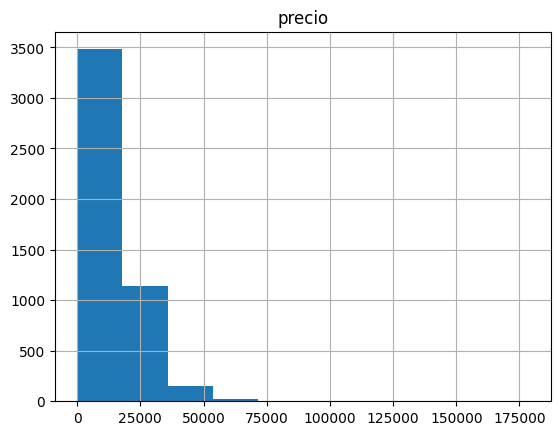

In [ ]:
df5.hist(column='precio')

<Axes: xlabel='precio'>

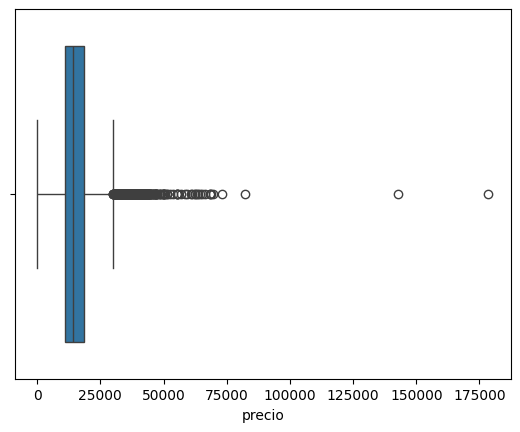

In [ ]:
sns.boxplot(x = df5['precio'])

In [ ]:
df_precio_superior_50000 = df5[df5["precio"] > 50000]
display(df_precio_superior_50000)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2
1,Various,13929.0,317.0,petrol,grey,Various,True,True,False,False,True,True,True,69700.0,2013-07-01,2018-02-01
68,Various,67403.0,230.0,diesel,black,Various,True,True,True,True,True,True,True,55200.0,2013-07-01,2018-02-01
72,Various,69410.0,317.0,petrol,white,Various,True,True,False,False,True,True,True,53600.0,2015-02-01,2018-03-01
2678,Serie 5,5578.0,195.0,diesel,grey,sedan,True,True,True,False,False,True,True,62500.0,2013-07-01,2018-02-01
2775,Various,13418.0,195.0,diesel,black,sedan,True,True,True,False,False,True,True,58300.0,2016-03-01,2018-03-01
2824,Various,58299.0,235.0,diesel,grey,sedan,True,True,False,False,False,True,True,63700.0,2016-04-01,2018-03-01
2944,Various,33670.0,317.0,petrol,blue,sedan,True,True,False,False,True,True,True,51200.0,2014-03-01,2018-04-01
3069,Various,42655.0,235.0,diesel,grey,Various,True,True,True,False,False,True,True,65400.0,2013-07-01,2018-05-01
3092,Various,39250.0,317.0,petrol,black,sedan,True,True,False,False,True,True,True,52400.0,2015-11-01,2018-05-01
3320,Various,25858.0,235.0,diesel,black,sedan,True,True,False,False,False,True,True,68300.0,2013-07-01,2018-06-01


In [ ]:
df5.drop(df5[df5["precio"] > 50000].index, inplace=True)

In [ ]:
df5["log_precio"] = np.log10(df5["precio"]) # Creamos una nueva variable "LOG_PRECIO" que será el logaritmo de "PRECIO"

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

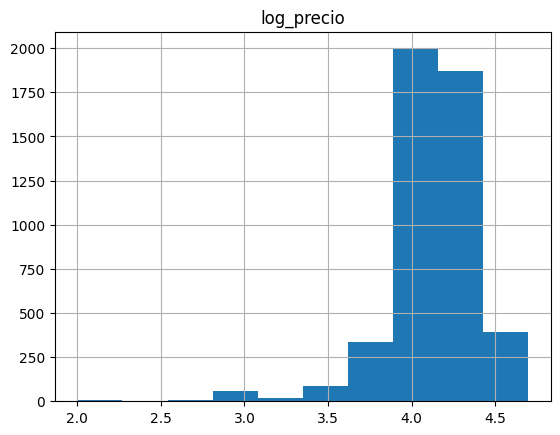

In [ ]:
df5.hist("log_precio") # Histograma del target transformado

<Axes: xlabel='log_precio'>

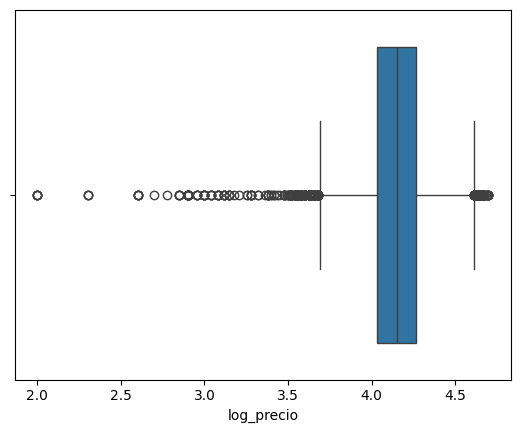

In [ ]:
sns.boxplot(x = df5['log_precio'])

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4769 non-null   object        
 1   km                    4769 non-null   float64       
 2   potencia              4769 non-null   float64       
 3   tipo_gasolina         4769 non-null   object        
 4   color                 4769 non-null   object        
 5   tipo_coche            4769 non-null   object        
 6   volante_regulable     4769 non-null   bool          
 7   aire_acondicionado    4769 non-null   bool          
 8   camara_trasera        4769 non-null   bool          
 9   elevalunas_electrico  4769 non-null   bool          
 10  bluetooth             4769 non-null   bool          
 11  gps                   4769 non-null   bool          
 12  alerta_lim_velocidad  4769 non-null   bool          
 13  precio                4

### CORRELACION

In [ ]:
df6 = df5.copy()

In [ ]:
corr_df = df6.corr(numeric_only = True) # Usamos la función de pandas "corr" que calcula la correlación entre las variables numéricas
corr_df.style.background_gradient(cmap='coolwarm') # Con esto obtenemos una tabla que muestra con colores la correlación entre variables

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,log_precio
km,1.000000,-0.013609,0.080373,0.031718,0.011337,0.048724,-0.027405,0.164721,-0.020325,-0.410934,-0.410239
potencia,-0.013609,1.000000,0.322763,0.180198,0.314602,0.365607,0.198816,0.003478,0.430093,0.663427,0.495351
volante_regulable,0.080373,0.322763,1.000000,0.285355,0.252621,0.282661,0.123897,0.243047,0.184906,0.284443,0.242507
aire_acondicionado,0.031718,0.180198,0.285355,1.000000,0.145014,0.259751,0.100595,0.343717,0.170271,0.251764,0.304238
camara_trasera,0.011337,0.314602,0.252621,0.145014,1.000000,0.204835,0.125369,0.060318,0.164846,0.263942,0.197037
elevalunas_electrico,0.048724,0.365607,0.282661,0.259751,0.204835,1.000000,0.235502,0.202280,0.303865,0.331649,0.336425
bluetooth,-0.027405,0.198816,0.123897,0.100595,0.125369,0.235502,1.000000,0.115366,0.075257,0.206492,0.183275
gps,0.164721,0.003478,0.243047,0.343717,0.060318,0.202280,0.115366,1.000000,-0.054432,0.007518,0.046622
alerta_lim_velocidad,-0.020325,0.430093,0.184906,0.170271,0.164846,0.303865,0.075257,-0.054432,1.000000,0.417877,0.362562
precio,-0.410934,0.663427,0.284443,0.251764,0.263942,0.331649,0.206492,0.007518,0.417877,1.000000,0.849294


In [ ]:
corr_df2=corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(bool))

In [ ]:
corr_df3=corr_df2.unstack().dropna()

In [ ]:
corr_df4=corr_df3.sort_values()

In [ ]:
corr_df4.head(20)

,,0
precio,km,-0.410934
log_precio,km,-0.410239
alerta_lim_velocidad,gps,-0.054432
bluetooth,km,-0.027405
alerta_lim_velocidad,km,-0.020325
potencia,km,-0.013609
gps,potencia,0.003478
precio,gps,0.007518
camara_trasera,km,0.011337
aire_acondicionado,km,0.031718


In [ ]:
corr_df4.tail(20)

,,0
camara_trasera,volante_regulable,0.252621
elevalunas_electrico,aire_acondicionado,0.259751
precio,camara_trasera,0.263942
elevalunas_electrico,volante_regulable,0.282661
precio,volante_regulable,0.284443
aire_acondicionado,volante_regulable,0.285355
alerta_lim_velocidad,elevalunas_electrico,0.303865
log_precio,aire_acondicionado,0.304238
camara_trasera,potencia,0.314602
volante_regulable,potencia,0.322763


Visto que hay una relacion media alta entre potencia y potencia agregada, hemos decidido no eliminarlas aun y esperar la correlacion final. Lo mismo pasa entre el precio y potencia.

In [ ]:
#salvar el documento
df5.to_csv('df5_final.csv', index=False)

# Análisis variable vs target, ¿Hay algún insight interesante?

VS categoria

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4769 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4769 non-null   object        
 1   km                    4769 non-null   float64       
 2   potencia              4769 non-null   float64       
 3   tipo_gasolina         4769 non-null   object        
 4   color                 4769 non-null   object        
 5   tipo_coche            4769 non-null   object        
 6   volante_regulable     4769 non-null   bool          
 7   aire_acondicionado    4769 non-null   bool          
 8   camara_trasera        4769 non-null   bool          
 9   elevalunas_electrico  4769 non-null   bool          
 10  bluetooth             4769 non-null   bool          
 11  gps                   4769 non-null   bool          
 12  alerta_lim_velocidad  4769 non-null   bool          
 13  precio                4

In [ ]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'camara_trasera',
 'elevalunas_electrico']

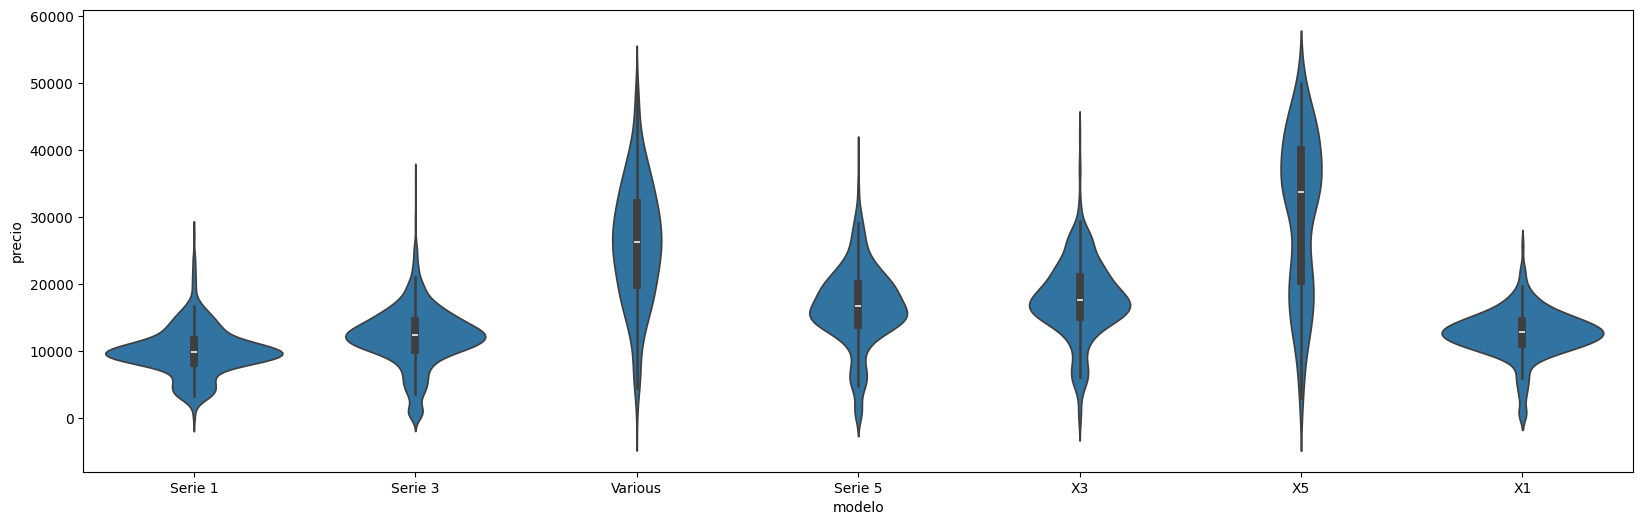

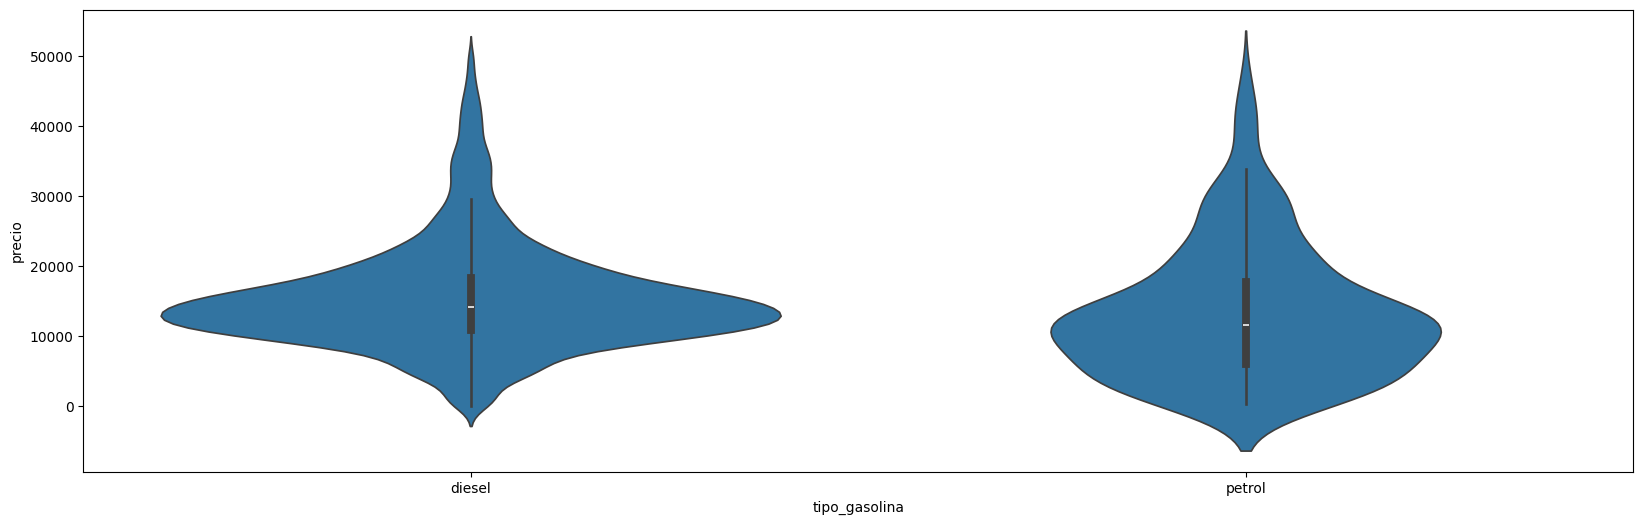

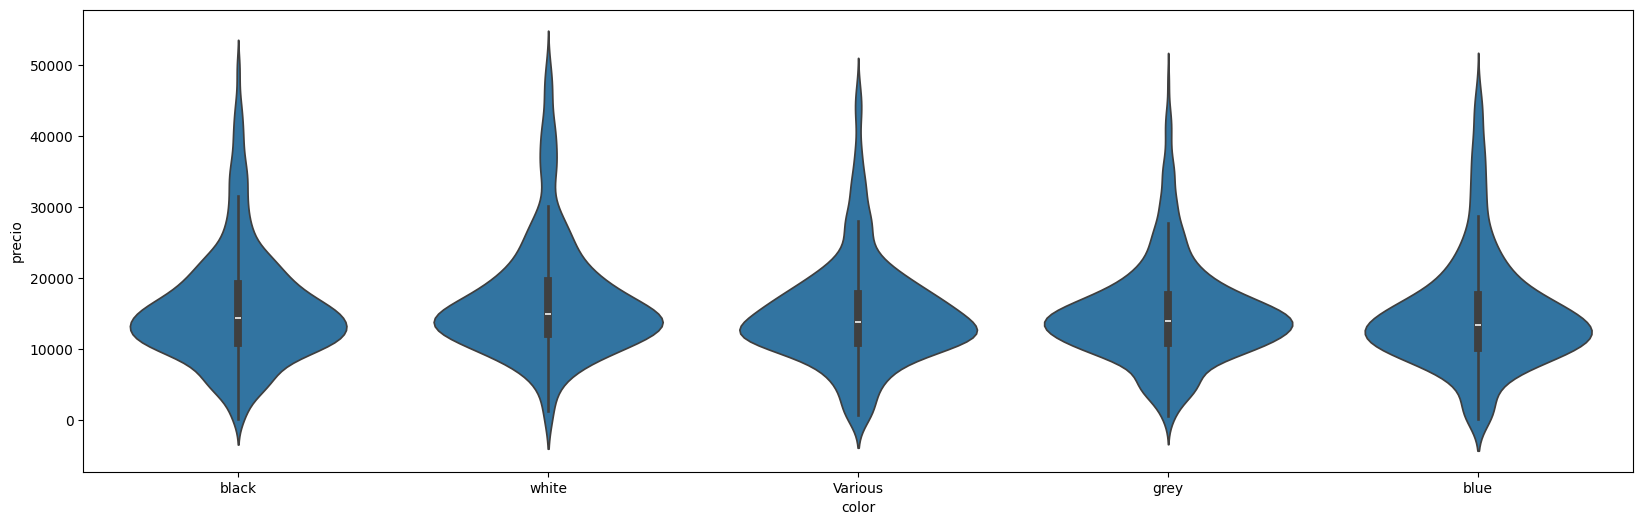

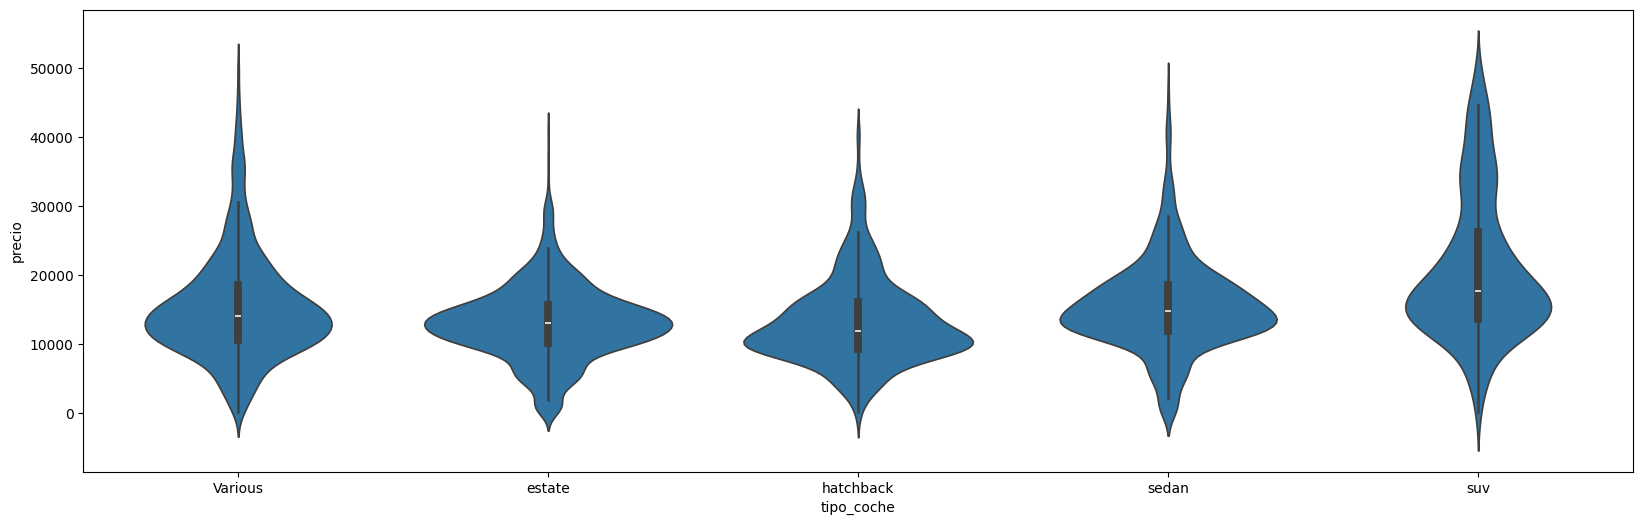

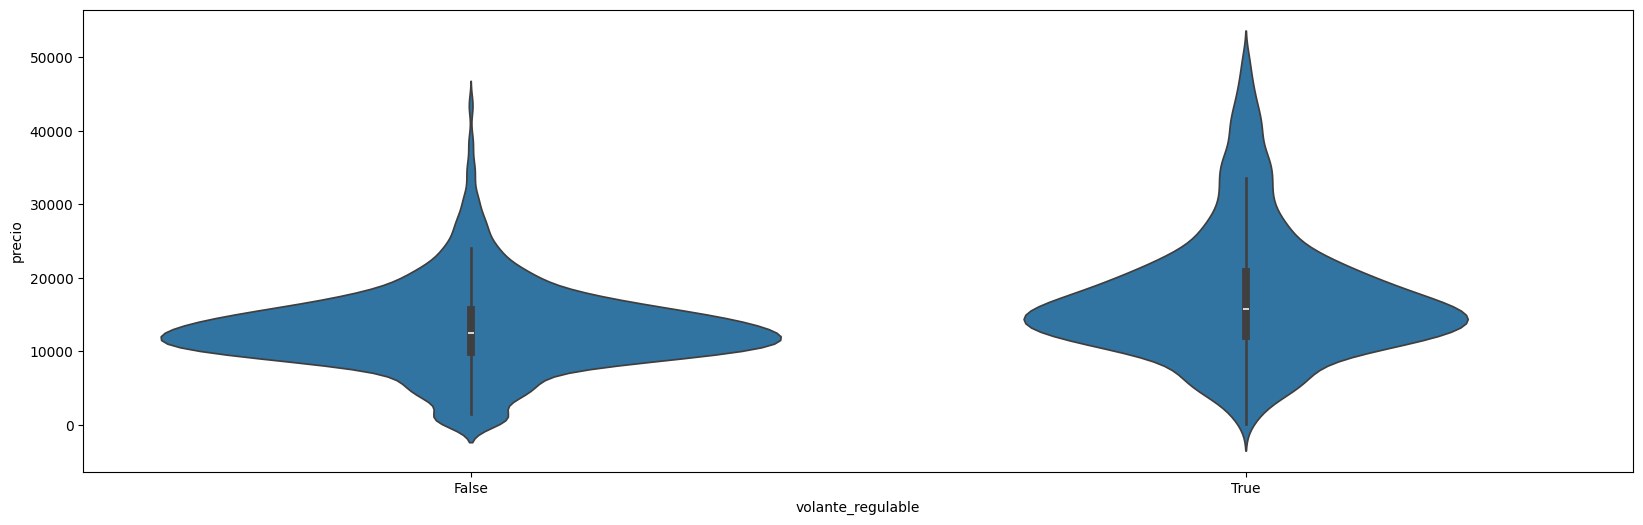

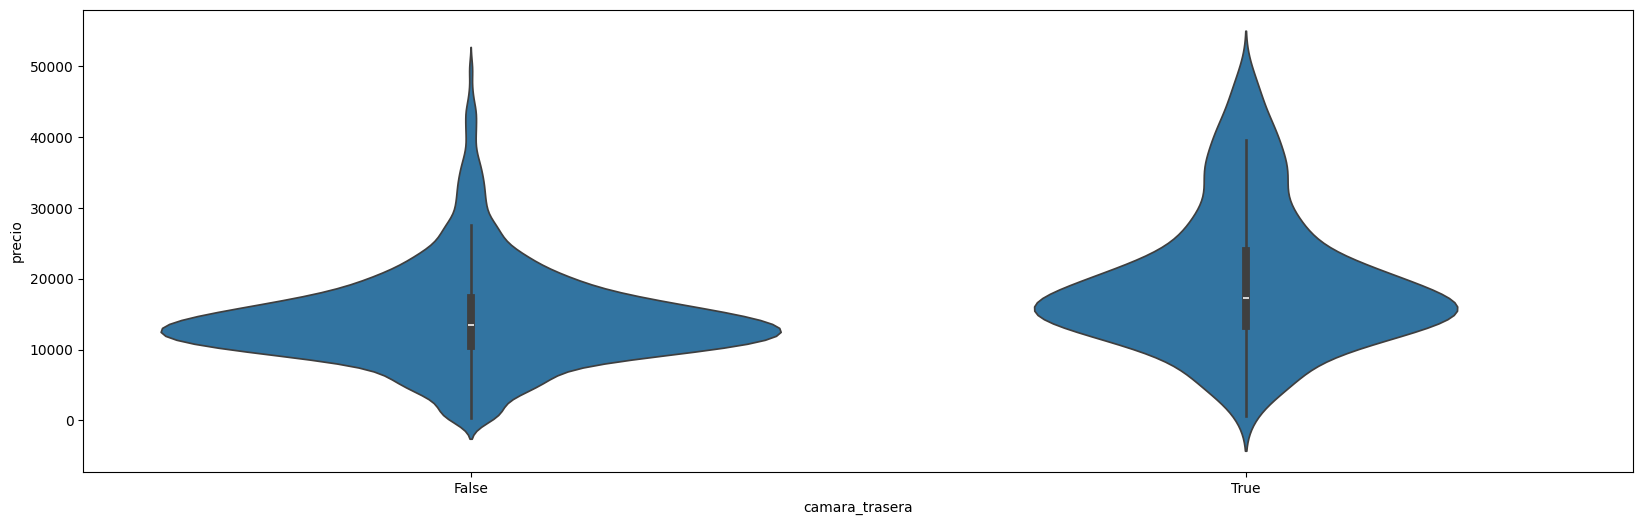

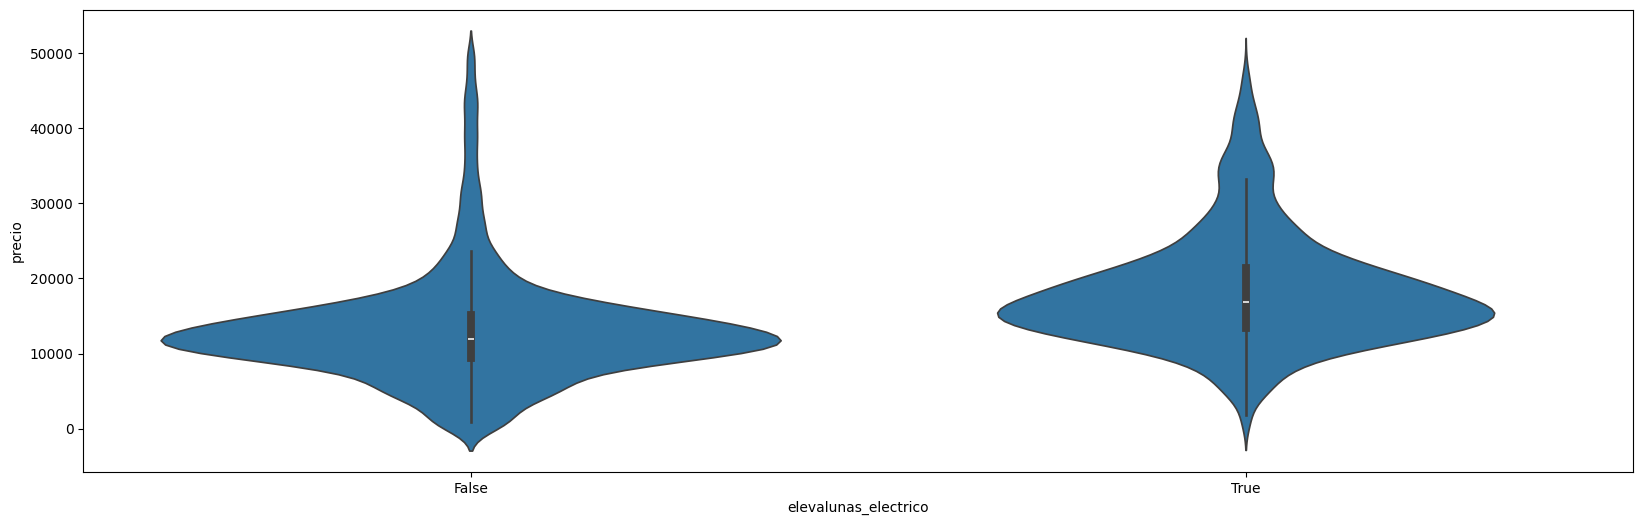

In [ ]:
for i in lista_categoricas:
  plt.figure(figsize=(20, 6))
  sns.violinplot(x=i, y="precio", data=df6)
  plt.show()

VS numericas

In [ ]:
lista_numericas

['km', 'potencia']

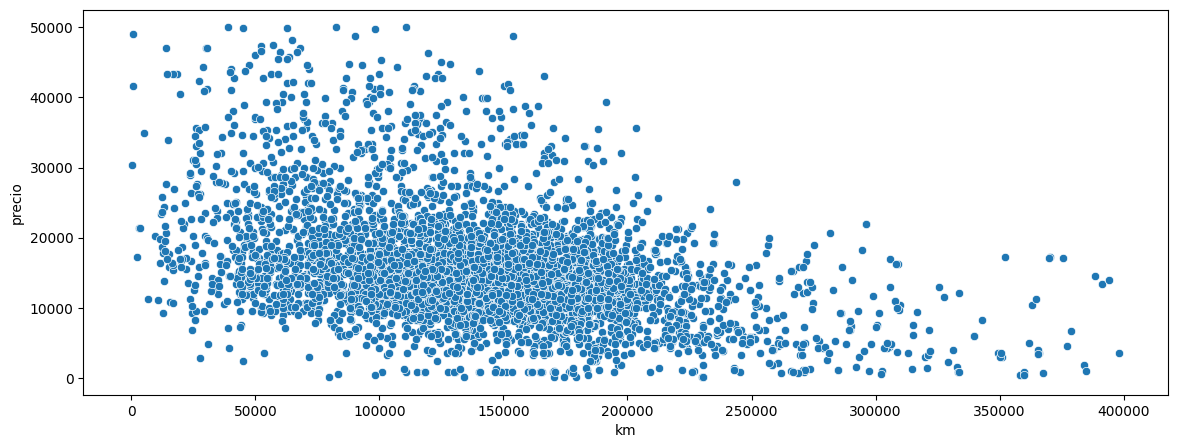

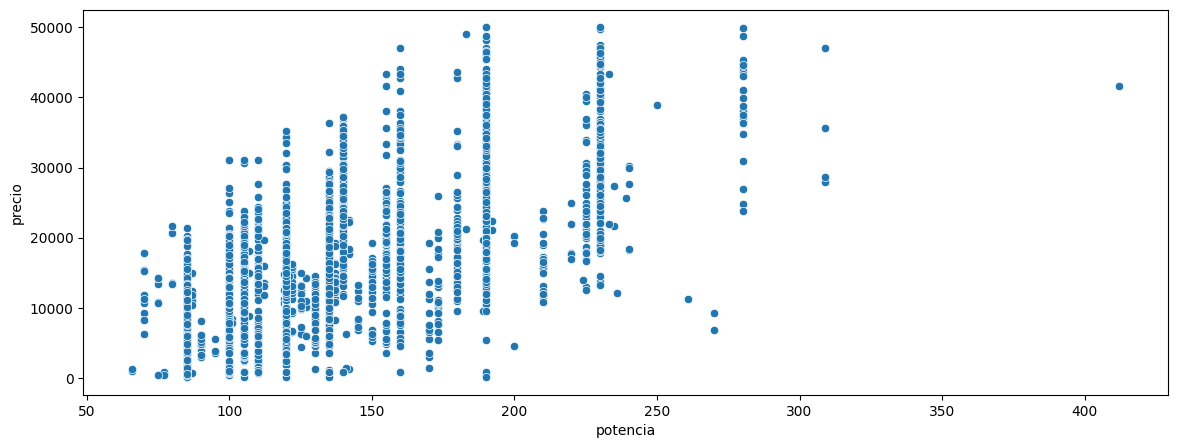

In [ ]:
for i in lista_numericas:
  plt.figure(figsize=(14,5))
  sns.scatterplot(x=i, y="precio", data=df6)

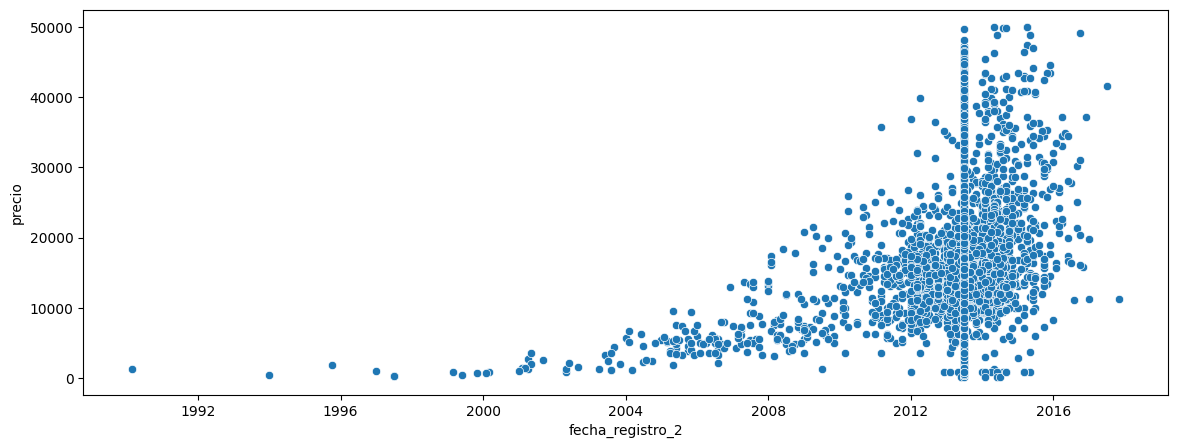

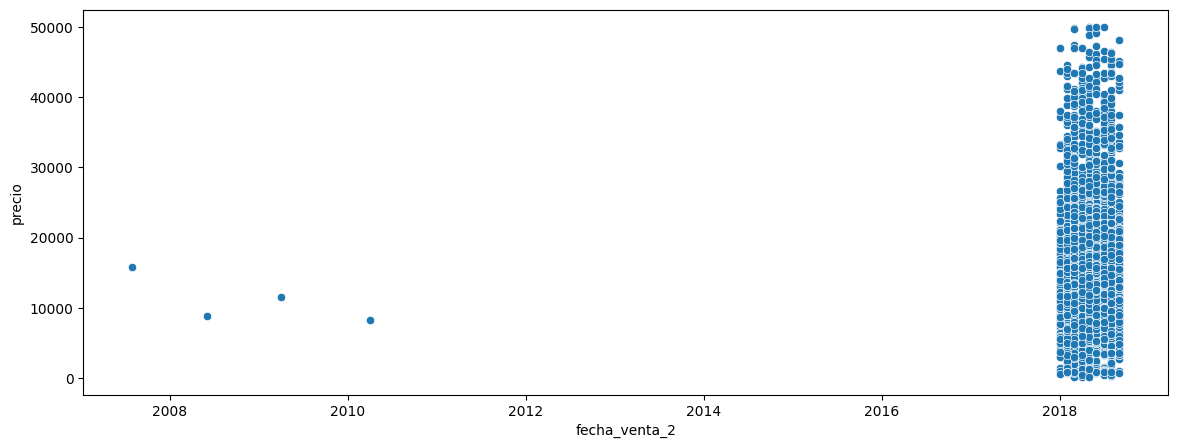

In [ ]:
for i in ["fecha_registro_2","fecha_venta_2"]:
  plt.figure(figsize=(14,5))
  sns.scatterplot(x=i, y="precio", data=df6)

Fecha venta : eliminar datos anteriores a 2018

In [ ]:
df6.drop(df6[df6["fecha_venta_2"].dt.year < 2018].index, inplace=True)

<Axes: xlabel='fecha_venta_2', ylabel='precio'>

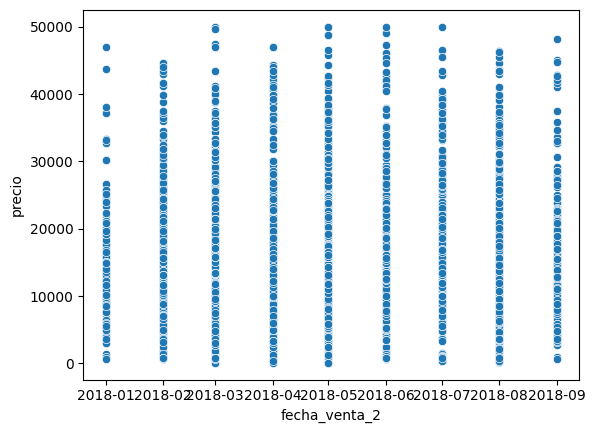

In [ ]:
 sns.scatterplot(x="fecha_venta_2", y="precio", data=df6)

Variable boolean

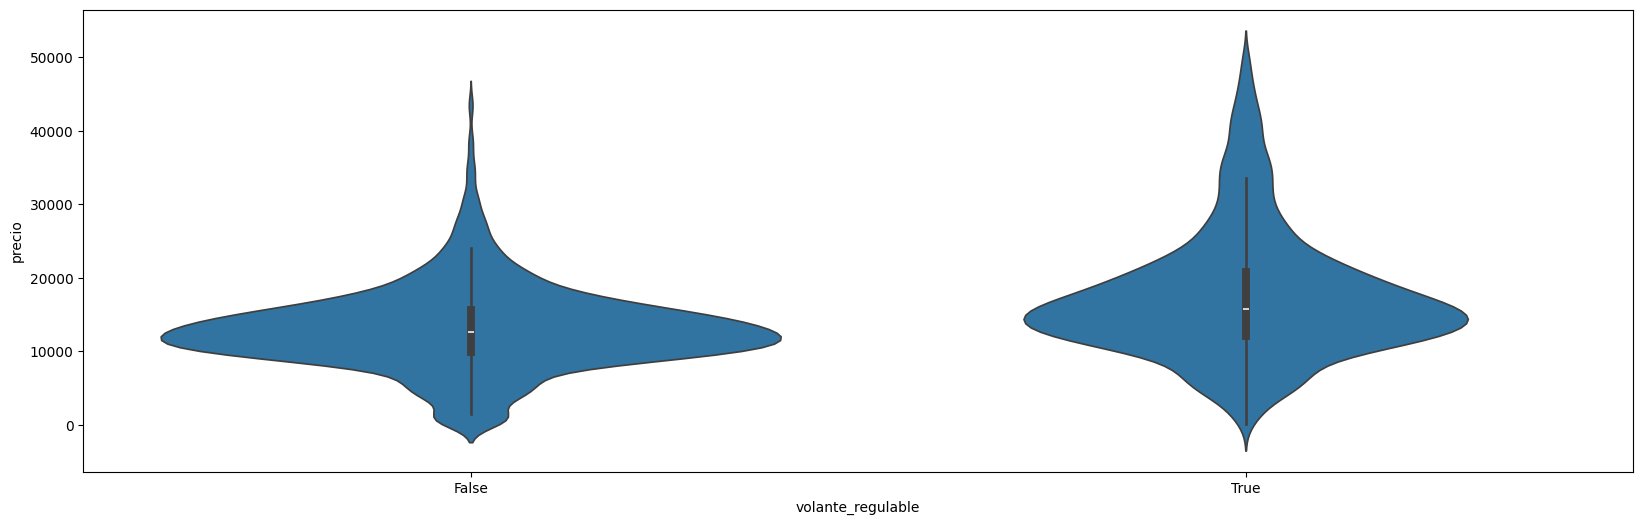

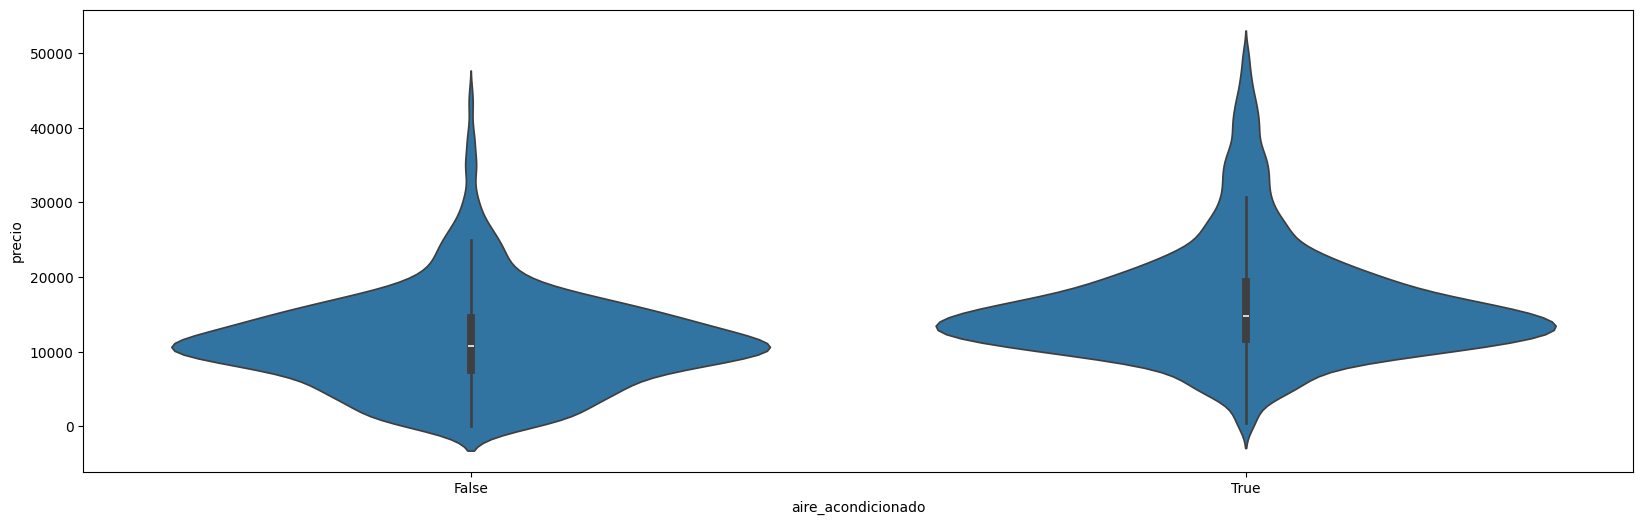

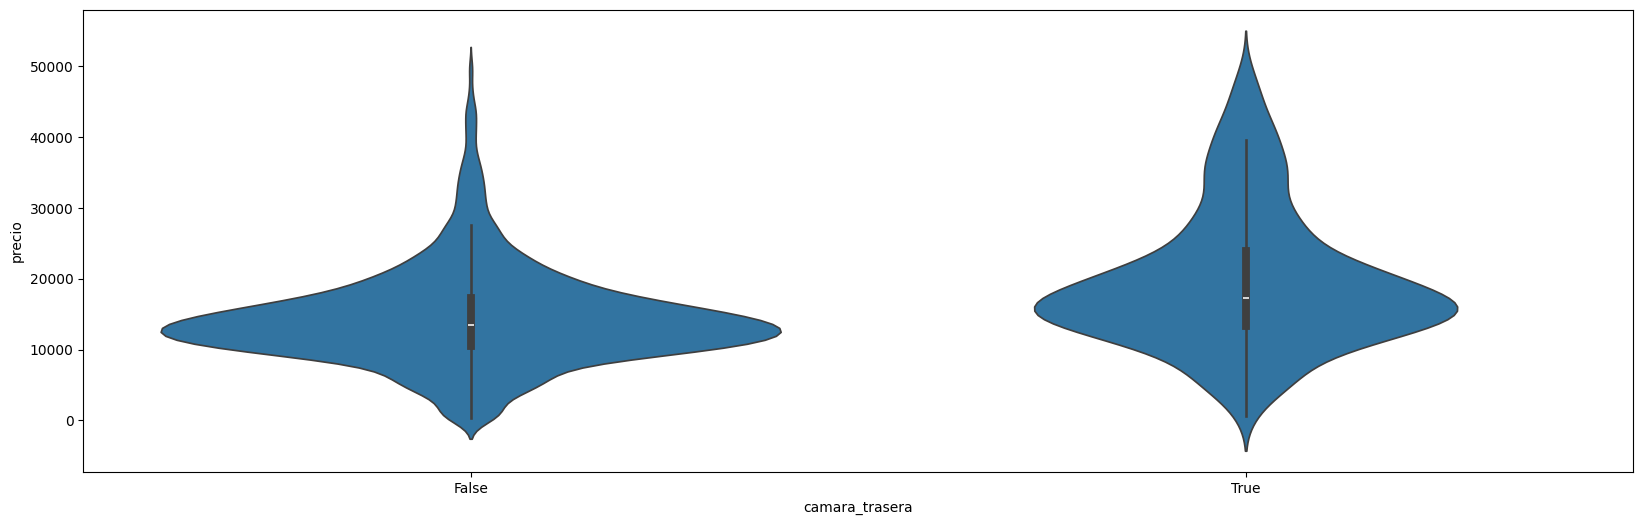

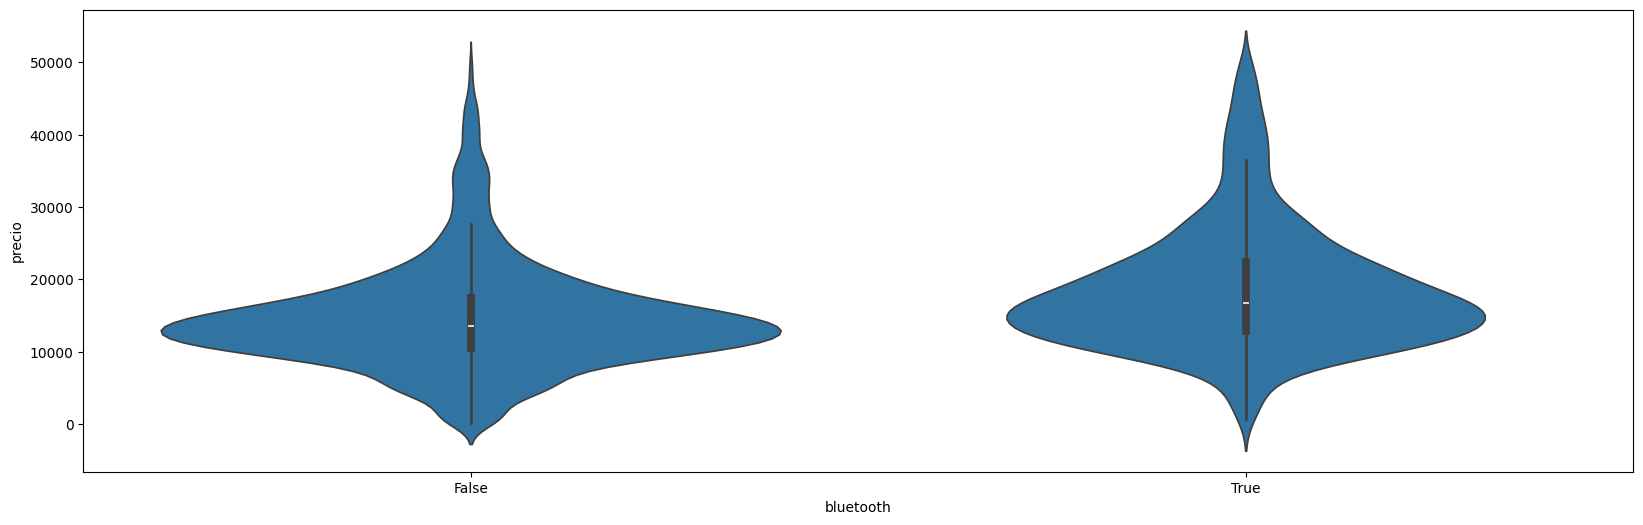

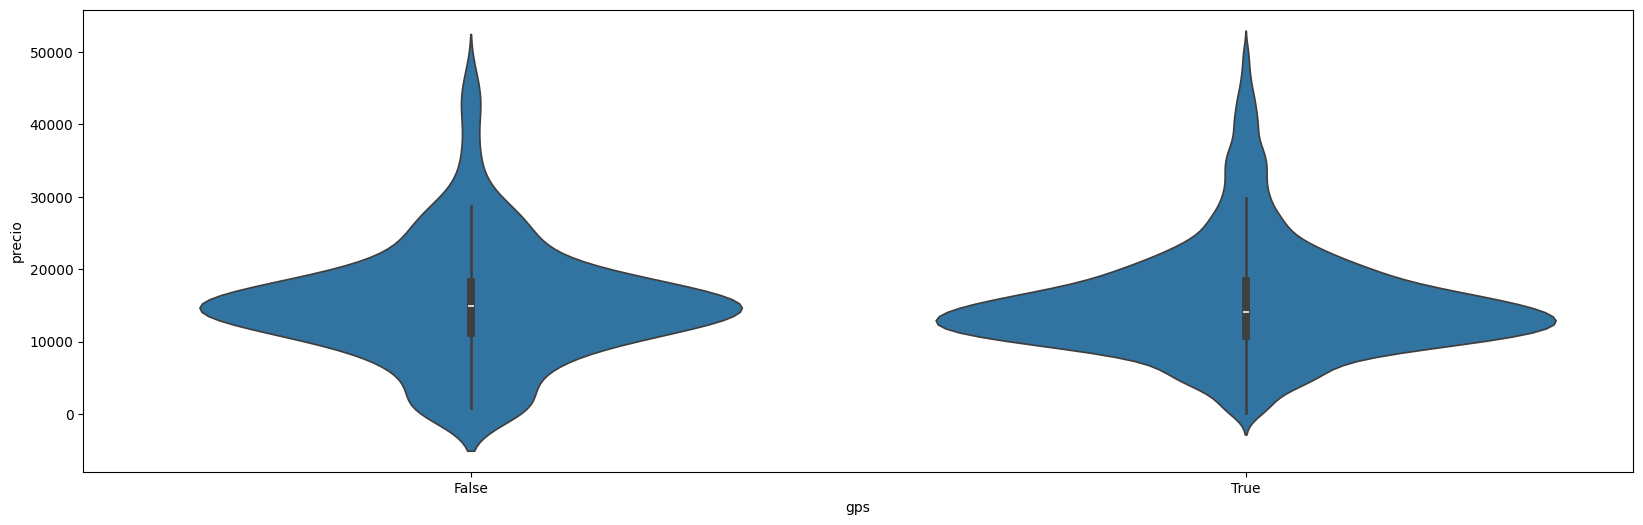

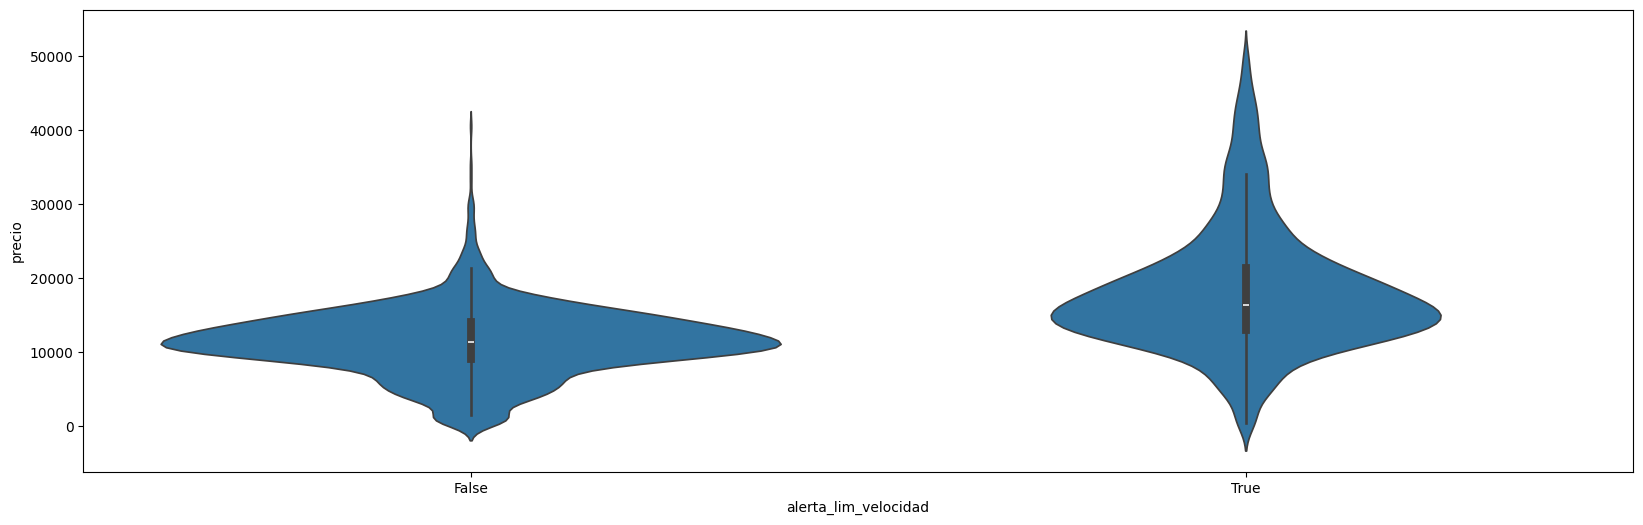

In [ ]:
for i in ['volante_regulable',
  'aire_acondicionado',"camara_trasera",
  'bluetooth',
  'gps',"alerta_lim_velocidad"]:
  plt.figure(figsize=(20, 6))
  sns.violinplot(x=i, y="precio", data=df6)
  plt.show()

# Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?texto en negrita

In [ ]:
df_clean=df6.copy()

In [ ]:
lista_categoricas


['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'camara_trasera',
 'elevalunas_electrico']

In [ ]:
lista_categoricas.remove("color")

In [ ]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'tipo_coche',
 'volante_regulable',
 'camara_trasera',
 'elevalunas_electrico']

In [ ]:
df_clean_proc=pd.get_dummies(df_clean, columns=lista_categoricas, drop_first=True)

In [ ]:
df_clean["modelo"].value_counts()

,count
modelo,
Serie 3,1779
Serie 5,1129
Serie 1,562
X3,436
Various,341
X1,273
X5,245


In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df_clean_proc

,km,potencia,color,aire_acondicionado,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2,log_precio,modelo_Serie 3,modelo_Serie 5,modelo_Various,modelo_X1,modelo_X3,modelo_X5,tipo_gasolina_petrol,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,volante_regulable_True,camara_trasera_True,elevalunas_electrico_True
0,140411.0,100.0,black,True,False,True,True,11300.0,2012-02-01,2018-01-01,4.053078,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,183297.0,120.0,white,False,False,True,False,10200.0,2012-04-01,2018-02-01,4.008600,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,128035.0,135.0,Various,True,True,True,True,25100.0,2013-07-01,2018-02-01,4.399674,False,False,True,False,False,False,False,False,False,False,False,True,False,True
4,97097.0,160.0,Various,True,True,True,True,33400.0,2013-07-01,2018-04-01,4.523746,False,False,True,False,False,False,False,False,False,False,False,True,False,False
5,152352.0,225.0,black,True,True,True,True,17100.0,2011-05-01,2018-02-01,4.232996,True,False,False,False,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,39743.0,110.0,black,True,False,True,False,14600.0,2013-07-01,2018-08-01,4.164353,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4839,49832.0,100.0,grey,True,False,True,True,17500.0,2015-06-01,2018-08-01,4.243038,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4840,19633.0,110.0,grey,True,False,True,True,17000.0,2015-10-01,2018-09-01,4.230449,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4841,27920.0,110.0,Various,True,False,True,True,22700.0,2016-04-01,2018-09-01,4.356026,False,False,True,False,False,False,False,False,False,False,False,True,False,False


# Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

In [ ]:
lista_numericas

['km', 'potencia']

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4765 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4765 non-null   object        
 1   km                    4765 non-null   float64       
 2   potencia              4765 non-null   float64       
 3   tipo_gasolina         4765 non-null   object        
 4   color                 4765 non-null   object        
 5   tipo_coche            4765 non-null   object        
 6   volante_regulable     4765 non-null   bool          
 7   aire_acondicionado    4765 non-null   bool          
 8   camara_trasera        4765 non-null   bool          
 9   elevalunas_electrico  4765 non-null   bool          
 10  bluetooth             4765 non-null   bool          
 11  gps                   4765 non-null   bool          
 12  alerta_lim_velocidad  4765 non-null   bool          
 13  precio                4

In [ ]:
for i in ["fecha_registro_2","fecha_venta_2"]:
    df_clean_proc[i + "_int"] = df_clean_proc[i].astype(int)
    lista_numericas.append(i + "_int")
    print(lista_numericas)

['km', 'potencia', 'fecha_registro_2_int']
['km', 'potencia', 'fecha_registro_2_int', 'fecha_venta_2_int']


In [ ]:
lista_numericas.append("log_precio")

In [ ]:
lista_numericas.append("precio")

In [ ]:
lista_numericas

['km',
 'potencia',
 'fecha_registro_2_int',
 'fecha_venta_2_int',
 'log_precio',
 'precio']

In [ ]:
MinMax= MinMaxScaler()

In [ ]:
 df_clean_proc[lista_numericas]= MinMax.fit_transform( df_clean_proc[lista_numericas])

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df_clean_proc.sample(10)

,km,potencia,color,aire_acondicionado,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_2,fecha_venta_2,log_precio,modelo_Serie 3,modelo_Serie 5,modelo_Various,modelo_X1,modelo_X3,modelo_X5,tipo_gasolina_petrol,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,volante_regulable_True,camara_trasera_True,elevalunas_electrico_True,fecha_registro_2_int,fecha_venta_2_int
2320,0.437758,0.098266,black,False,False,True,True,0.096192,2013-07-01,2018-07-01,0.626237,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.843277,0.744856
1729,0.209557,0.242775,black,True,False,True,True,0.134269,2013-07-01,2018-09-01,0.678966,False,True,False,False,False,False,False,False,False,False,False,True,True,True,0.843277,1.000000
2495,0.331313,0.098266,grey,False,False,True,False,0.170341,2013-07-01,2018-06-01,0.716754,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0.843277,0.621399
2774,0.429248,0.112717,grey,True,True,True,True,0.408818,2013-07-01,2018-03-01,0.856532,True,False,False,False,False,False,False,False,False,True,False,False,False,False,0.843277,0.242798
534,0.339628,0.156069,black,True,False,True,True,0.208417,2013-07-01,2018-06-01,0.748874,True,False,False,False,False,False,False,True,False,False,False,True,False,True,0.843277,0.621399
3543,0.470326,0.156069,black,True,False,True,True,0.284569,2013-07-01,2018-08-01,0.798577,False,True,False,False,False,False,False,False,False,True,False,False,False,False,0.843277,0.872428
1231,0.217380,0.054913,blue,False,False,False,True,0.118236,2014-02-01,2018-05-01,0.658826,True,False,False,False,False,False,False,True,False,False,False,False,False,False,0.864549,0.493827
433,0.317116,0.156069,black,True,False,True,True,0.324649,2013-07-01,2018-02-01,0.819641,False,True,False,False,False,False,False,True,False,False,False,True,False,True,0.843277,0.127572
4588,0.434951,0.156069,Various,True,False,True,False,0.260521,2013-09-01,2018-07-01,0.784474,False,False,False,True,False,False,False,False,False,False,True,True,False,True,0.849411,0.744856
3689,0.454610,0.054913,white,True,False,True,False,0.184369,2013-07-01,2018-03-01,0.729346,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.843277,0.242798


In [ ]:
df_clean_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4765 entries, 0 to 4842
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   km                         4765 non-null   float64       
 1   potencia                   4765 non-null   float64       
 2   color                      4765 non-null   object        
 3   aire_acondicionado         4765 non-null   bool          
 4   bluetooth                  4765 non-null   bool          
 5   gps                        4765 non-null   bool          
 6   alerta_lim_velocidad       4765 non-null   bool          
 7   precio                     4765 non-null   float64       
 8   fecha_registro_2           4765 non-null   datetime64[ns]
 9   fecha_venta_2              4765 non-null   datetime64[ns]
 10  log_precio                 4765 non-null   float64       
 11  modelo_Serie 3             4765 non-null   bool          
 12  modelo_Seri

Eliminamos Columna "fecha_registro_2","fecha_venta_2" poque se ha creado nueva columna fech INT

In [ ]:
df_clean_proc.drop(["fecha_registro_2","fecha_venta_2"], axis=1, inplace=True)

In [ ]:
corr_fin=df_clean_proc.corr(numeric_only=True)

In [ ]:
corr_fin.style.background_gradient(cmap='coolwarm')

,km,potencia,aire_acondicionado,bluetooth,gps,alerta_lim_velocidad,precio,log_precio,modelo_Serie 3,modelo_Serie 5,modelo_Various,modelo_X1,modelo_X3,modelo_X5,tipo_gasolina_petrol,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,volante_regulable_True,camara_trasera_True,elevalunas_electrico_True,fecha_registro_2_int,fecha_venta_2_int
km,1.000000,-0.013486,0.031243,-0.026888,0.164668,-0.020795,-0.410669,-0.410130,0.102096,0.172266,-0.183086,-0.062160,-0.037332,-0.039554,-0.029789,0.133520,-0.101574,0.071319,-0.086847,0.081289,0.011905,0.048358,-0.321347,-0.000353
potencia,-0.013486,1.000000,0.180260,0.198925,0.003470,0.429873,0.663579,0.495363,-0.290259,0.222699,0.313542,-0.117748,0.051735,0.378796,0.100595,-0.033730,-0.178313,0.021249,0.193352,0.322960,0.314762,0.365270,0.045962,-0.030292
aire_acondicionado,0.031243,0.180260,1.000000,0.100818,0.343653,0.170235,0.252060,0.304447,-0.033366,0.187397,0.045979,-0.108585,-0.008578,0.081328,-0.091321,0.081882,-0.068952,0.057987,-0.011192,0.285542,0.145242,0.259857,0.132476,0.006842
bluetooth,-0.026888,0.198925,0.100818,1.000000,0.115496,0.075414,0.206315,0.183166,-0.018012,-0.015265,0.084865,-0.075992,0.033541,0.025340,0.023788,-0.013730,0.028465,-0.012287,0.004697,0.123922,0.125183,0.235658,0.043451,-0.014739
gps,0.164668,0.003470,0.343653,0.115496,1.000000,-0.054518,0.007646,0.046709,0.002550,0.086409,-0.003577,-0.121464,-0.077705,0.028298,-0.049825,0.056642,-0.001190,0.036469,-0.100250,0.243180,0.060438,0.202355,-0.056438,0.065007
alerta_lim_velocidad,-0.020795,0.429873,0.170235,0.075414,-0.054518,1.000000,0.418121,0.362690,-0.161647,0.209484,0.111676,-0.060377,0.065547,0.172407,-0.014470,-0.006182,-0.120954,0.037000,0.115712,0.185508,0.165043,0.303656,0.090127,-0.033406
precio,-0.410669,0.663579,0.252060,0.206315,0.007646,0.418121,1.000000,0.849264,-0.324247,0.087120,0.374557,-0.087582,0.093175,0.448422,-0.060674,-0.167804,-0.096346,0.002261,0.290152,0.284443,0.263786,0.331789,0.324436,0.004941
log_precio,-0.410130,0.495363,0.304447,0.183166,0.046709,0.362690,0.849264,1.000000,-0.253988,0.107564,0.262192,-0.047479,0.105661,0.269549,-0.118762,-0.130538,-0.069656,0.014453,0.207060,0.242481,0.196933,0.336548,0.419795,-0.002386
modelo_Serie 3,0.102096,-0.290259,-0.033366,-0.018012,0.002550,-0.161647,-0.324247,-0.253988,1.000000,-0.430109,-0.214295,-0.190285,-0.244959,-0.179704,0.001249,0.277530,-0.089072,0.121300,-0.330960,-0.200342,-0.150603,-0.161592,-0.002962,-0.048521
modelo_Serie 5,0.172266,0.222699,0.187397,-0.015265,0.086409,0.209484,0.087120,0.107564,-0.430109,1.000000,-0.154705,-0.137371,-0.176842,-0.129733,-0.025662,0.177298,-0.141873,0.206815,-0.237566,0.273073,0.099954,0.249030,-0.047241,-0.055216


In [ ]:
corr_fin2=corr_fin.where(np.triu(np.ones(corr_fin.shape),k=1).astype(bool))

In [ ]:
corr_fin3=corr_fin2.unstack().dropna()

In [ ]:
corr_fin4=corr_fin3.sort_values()*100

In [ ]:
corr_fin4.head(20)

modelo_Serie 5          modelo_Serie 3      -43.010858
precio                  km                  -41.066939
log_precio              km                  -41.012963
tipo_coche_suv          modelo_Serie 3      -33.096037
modelo_Serie 3          precio              -32.424698
fecha_registro_2_int    km                  -32.134730
modelo_Serie 3          potencia            -29.025866
                        log_precio          -25.398791
tipo_coche_sedan        tipo_coche_estate   -24.672029
modelo_X3               modelo_Serie 3      -24.495851
tipo_coche_suv          modelo_Serie 5      -23.756578
                        tipo_coche_estate   -23.393309
modelo_Various          modelo_Serie 3      -21.429533
volante_regulable_True  modelo_Serie 3      -20.034219
tipo_coche_suv          tipo_coche_sedan    -19.390055
modelo_X1               modelo_Serie 3      -19.028499
tipo_coche_hatchback    tipo_coche_estate   -18.365710
modelo_Various          km                  -18.308564
modelo_X5               modelo_Serie 3      -17.970365
tipo_coche_hatchback    potencia            -17.831346
dtype: float64

In [ ]:
corr_fin4.tail(20)

camara_trasera_True        potencia                31.476228
volante_regulable_True     potencia                32.295960
fecha_registro_2_int       precio                  32.443630
elevalunas_electrico_True  precio                  33.178925
                           log_precio              33.654794
gps                        aire_acondicionado      34.365304
tipo_coche_suv             modelo_X5               35.931833
log_precio                 alerta_lim_velocidad    36.269011
elevalunas_electrico_True  potencia                36.527027
tipo_coche_suv             modelo_X1               37.299606
modelo_Various             precio                  37.455723
modelo_X5                  potencia                37.879563
precio                     alerta_lim_velocidad    41.812069
fecha_registro_2_int       log_precio              41.979489
alerta_lim_velocidad       potencia                42.987340
modelo_X5                  precio                  44.842241
tipo_coche_suv             modelo_X3               48.692476
log_precio                 potencia                49.536283
precio                     potencia                66.357880
log_precio                 precio                  84.926434
dtype: float64

In [ ]:
df_clean_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4765 entries, 0 to 4842
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   km                         4765 non-null   float64
 1   potencia                   4765 non-null   float64
 2   color                      4765 non-null   object 
 3   aire_acondicionado         4765 non-null   bool   
 4   bluetooth                  4765 non-null   bool   
 5   gps                        4765 non-null   bool   
 6   alerta_lim_velocidad       4765 non-null   bool   
 7   precio                     4765 non-null   float64
 8   log_precio                 4765 non-null   float64
 9   modelo_Serie 3             4765 non-null   bool   
 10  modelo_Serie 5             4765 non-null   bool   
 11  modelo_Various             4765 non-null   bool   
 12  modelo_X1                  4765 non-null   bool   
 13  modelo_X3                  4765 non-null   bool   
 1

In [ ]:
df_clean_proc.to_excel("df_clean_proc.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("df_clean_proc.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>